Name: Mia Merlid
Course: STK-IN4300, 2024

### Imports and data handling

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

**Data taken from:** https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
Thank you to the user KUMARRAJARSHI for providing this dataset openly on Kaggle. 

In [2]:
# loading data
data = pd.read_csv("Life Expectancy Data-kopi.csv")

# looking at the data
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
# for this project we will consider the year 2015 only, just for simplicity
df = data[data["Year"] == 2015]

### Problem 1. Summary Statistics Table

This data set contains information about life expectancy in different countries as well as variables that might be good predictors for life expectancy. The data set contains 185 rows and 22 columns. The rows corresponds to different countries. We use the year 2015 only, although the original data set contains data many years. 

The columns contain information about health, school, expenses, development status and other variables related to life expectancy.

This data could be used to predict life expectancy in different countries. This is an important task because it can help us understand what factors are important for life expectancy and therefore how we can improve it. 

In [4]:
# summary statistics table
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,183.0,183.000000,183.000000,183.000000,6.000000,183.000000,174.000000,183.000000,181.000000,183.000000,183.000000,2.000000,183.000000,183.000000,154.000000,1.420000e+02,181.000000,181.000000,173.000000,173.000000
mean,2015.0,71.616940,152.863388,23.803279,5.288333,2.383906,82.425287,1502.901639,42.754144,31.612022,83.207650,7.080000,84.633880,0.660656,7185.331746,1.109741e+07,4.534807,4.575691,0.691740,12.927168
std,0.0,8.123706,97.561184,83.683762,4.038115,27.461032,24.008492,7842.394928,20.685702,107.779778,24.245778,1.527351,22.162793,1.344702,11697.508913,2.896230e+07,4.099425,4.180785,0.153412,2.912366
min,2015.0,51.000000,1.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000
25%,2015.0,65.750000,74.000000,0.000000,2.492500,0.000000,78.750000,0.000000,24.300000,0.000000,83.000000,6.540000,83.500000,0.100000,766.008101,2.680710e+05,1.500000,1.500000,0.565000,10.800000
50%,2015.0,73.900000,138.000000,2.000000,5.285000,0.000000,93.000000,17.000000,48.600000,3.000000,93.000000,7.080000,93.000000,0.100000,2916.228918,2.076086e+06,3.500000,3.400000,0.723000,13.100000
75%,2015.0,76.950000,213.000000,17.000000,8.017500,0.000000,97.000000,202.000000,61.400000,21.000000,97.000000,7.620000,97.000000,0.400000,7290.107448,9.940296e+06,6.500000,6.400000,0.798000,15.000000
max,2015.0,88.000000,484.000000,910.000000,10.660000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,8.160000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000


### Problem 2. Bad Data Visualization

##### Bad visualization for a categorical variable

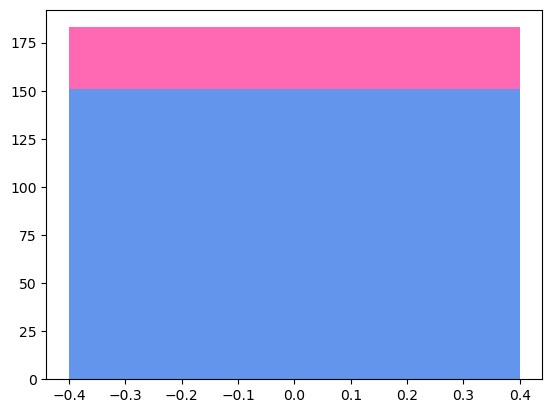

In [5]:
# count the number of "Developing" and "Developed" countries
counts = df["Status"].value_counts()
assert len(counts) == 2, "More/less than 'Developed' and 'Developing' countries, something wrong"

# Ploting
plt.bar(0, counts["Developing"], color = "cornflowerblue") # making a bar for developing countries
plt.bar(0, counts["Developed"], bottom = counts["Developing"], color = "hotpink") # adding the bar for developed countries on top 
plt.show()

This is an absolutely horrible plot. It makes no sense to have an x-axis, especially not continuous. What we have is two categories, not a continuous variable. Neither of the axes are labeled, which they definetly should be. There is no label showing which category is which. A title is also missing. This is not a very common way to show the ratio of two different categories so it is probably not intuitive to most people.

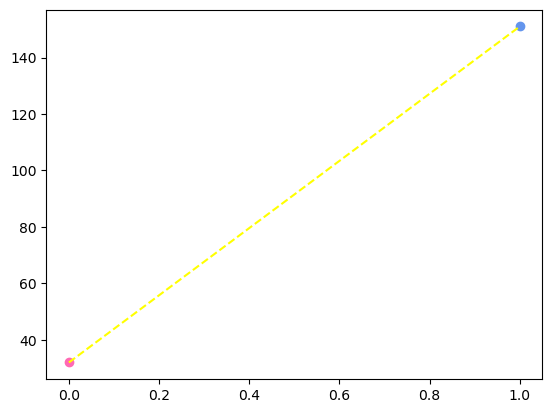

In [6]:
#Plotting
plt.plot(0, counts["Developed"], "o", color = "hotpink") 
plt.plot(1, counts["Developing"], "o", color = "cornflowerblue")
plt.plot([0,1],[counts["Developed"], counts["Developing"]], "--", color = "yellow")
plt.show()

This is another horrible way to show the same data. I do not know who would ever come up with this if not specifically asked to make a bad plot for an assignment. Yet again it does not make sense to have a continous x-axis. This line makes the reader thing this is some kind of graph or predictions, so it is very disrupting. Yet again the labels on the axes and for the colors are missing. There is no title. 

##### Good visualization for a categorical variable

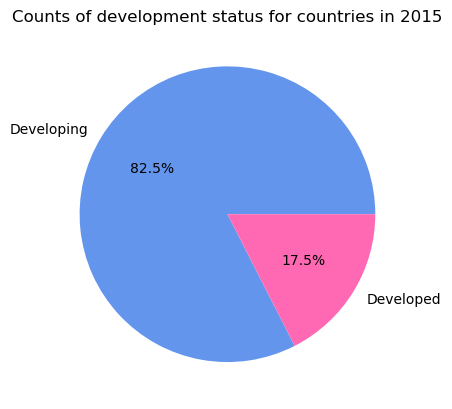

In [7]:
#plotting
fig, ax = plt.subplots()
ax.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors = ["cornflowerblue", "hotpink"]) #including autopct to have the percentages show in the "cake pieces"
plt.title("Counts of development status for countries in 2015")
plt.show()

This is a much better and more familiar way to show the ratio of the two categories. A pie chart is great for when only the ratio matter and not the absolute number (although they could be added as a label). The labels clearly show which color represents which category. The title is informative and consise. The colors are different enough to be easily distinguished. The labels indicate the ratio of the two (rounded off to one decimal).

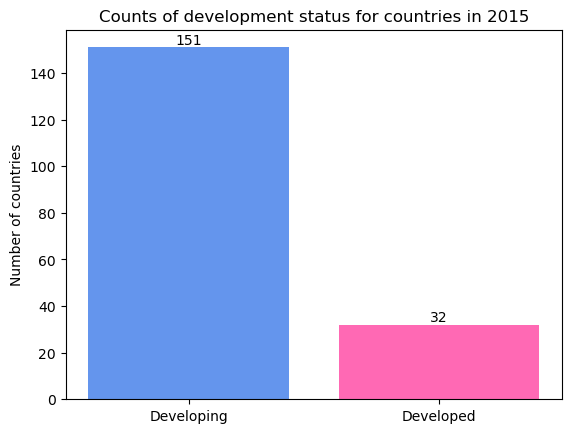

In [8]:
# making a bar plot for the counts of development status 
fig, ax = plt.subplots()
ax.bar(counts.index, counts, color=["cornflowerblue", "hotpink"]) # adjusting colors 
for indx, count in zip([0,1],counts): # adding numbers
    ax.text(indx, count, str(count), ha = "center", va = "bottom") 
plt.title("Counts of development status for countries in 2015")
plt.ylabel("Number of countries")
plt.show()

This is another good way of visualizing the data. Here we focus on the absolute numbers and not the ratio in percentage, although we easily can see a approximate ratio by eye. The x-axis is clearly labeled. There are different colors to distinguish the two categories. Yet again, we have a informative and consise title (the same one as above). The y-axis is labeled correctly. 

##### Bad visualization for a numerical variable

In [9]:
# choosing two numerical variables for the good and bad visualization
variable1 = "Schooling"
variable2 = " thinness  1-19 years"

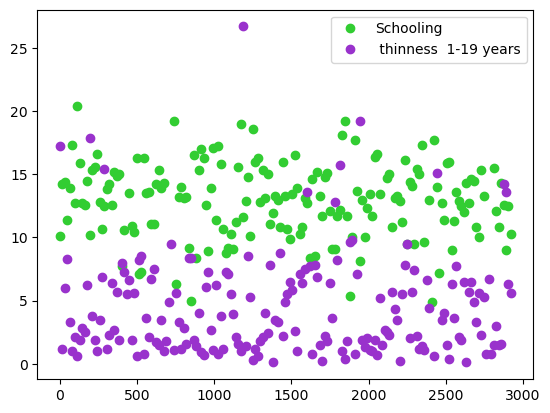

In [10]:
# plotting both in same plot
plt.plot(df[variable1], "o", color = "limegreen", label = variable1)
plt.plot(df[variable2], "o", color = "darkorchid", label = variable2)
plt.legend()
plt.show()

The simplest way of plotting (simply plt.plot(data)) gives us a very bad and little informative result. The labels for the axes are not the same for the two variables, so we would either need to axes or not plot them together for it to make sense. Here the axes are not lebeled at all, which is even worse. One of the variables could have been plotted as stars and not dots to be more accesible to colorblind people. The title is missing. Labels for which color reoresents which category is also missing.

##### Good visualization for a numerical variable

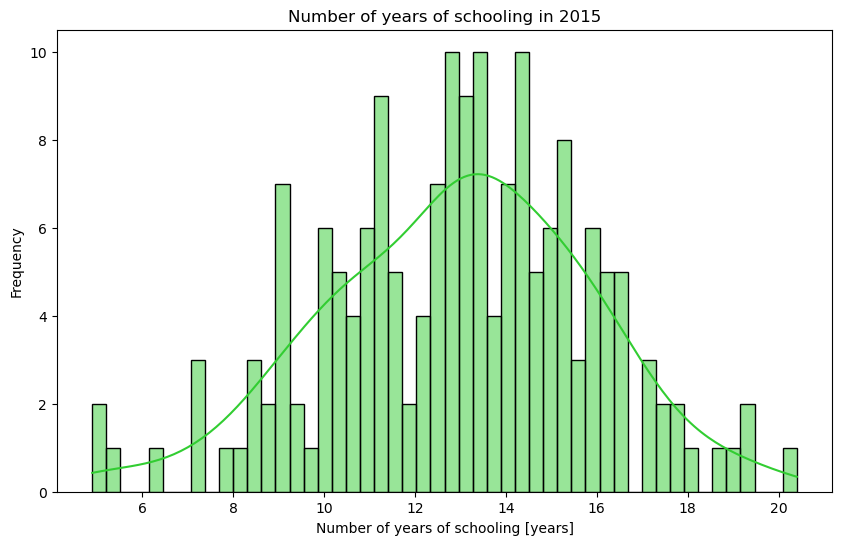

In [11]:
# plotting variable1 alone in a histogram 
plt.figure(figsize = (10, 6))
sns.histplot(df[variable1], bins = 50, color = "limegreen", kde = True) # kde=True gives a density line on top of the bins 
plt.xlabel("Number of years of schooling [years]")
plt.ylabel("Frequency")
plt.title("Number of years of schooling in 2015")
plt.show()

It makes more sense to split these to variables apart and plot them separately. The number of years of school in the different countries are here shown in a histogram. This is a common way to display numerical data. It highlights well the distribution of the data. The seaborn library also allows for the argument kde = True, which adds a density line. Here we see that it seems to be (very) roughly normally distributed. That is an exiting observation and a reason why we should plot the data in different ways. 

The labels for the axes and the title is correct. 

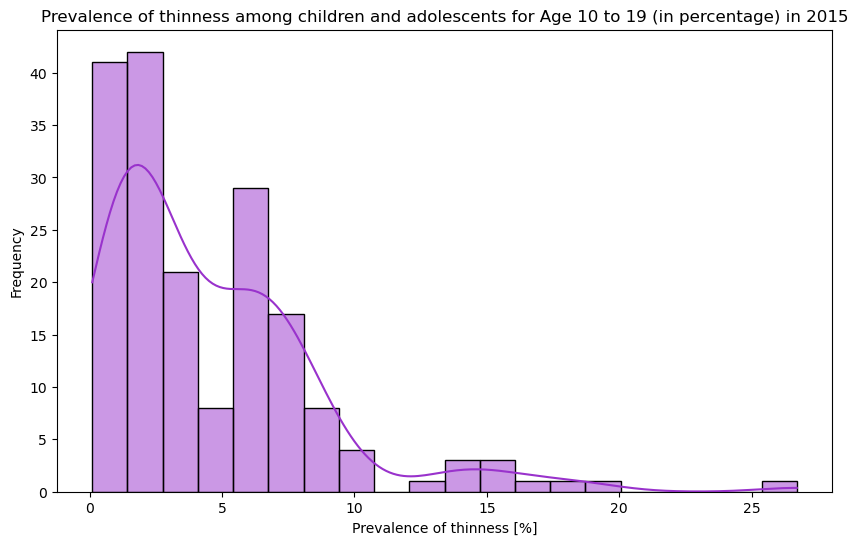

In [12]:
# Plotting variable2
plt.figure(figsize=(10, 6))
sns.histplot(df[variable2], bins=20, kde=True, color="darkorchid")
plt.title("Prevalence of thinness among children and adolescents for Age 10 to 19 (in percentage) in 2015")
plt.xlabel("Prevalence of thinness [%]")
plt.ylabel("Frequency")
plt.show()

The same reasoning holds for this plot as well. Here we spot that it (very very) roughly looks like a Poisson distribution, another exiting observation. The labels for the axes and the title are good.

### Problem 4. Simple analysis

In [13]:
# In order to do regression we need to one hot encode the categorical variables, we only have the variable"Status"
df = pd.get_dummies(df, columns=["Status"])

In [14]:
# count nan values
df.isna().sum()

Country                              0
Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
 BMI                                 2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
Status_Developed                     0
Status_Developing                    0
dtype: int64

In [15]:
# dropping columns Alcohol and Total expenditure due to too many nan values, also dropping country (simply an "ID")
df = df.drop(columns=["Alcohol", "Total expenditure","Country"])
# using the mean for the GDP, Population, thinness  1-19 years, thinness  5-9 years, Income composition of resources, and Schooling columns
# do not want to drop any more nan rows or columns as we would lose too much data
df = df.fillna(df.mean())

In [16]:
# linear regression to predict "Life expectancy"

# spliting data into X and y, variables/features and the target variable
X = df.drop(["Life expectancy "], axis=1)
y = df["Life expectancy "]

# spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

# creating the model
model = LinearRegression()

num_variables = int(len(X.columns))

MSE_list = []

for n in range(1,num_variables-1):
    # doing forward selection
    forward = SequentialFeatureSelector(model, n_features_to_select=n, direction="forward")
    forward.fit(X_train, y_train)

    # getting the selected features
    selected = forward.get_support()

    # taking ut the selected features only
    X_train_selected = forward.transform(X_train)
    X_test_selected = forward.transform(X_test)

    # fitting the original linear regression model on the selected features
    model.fit(X_train_selected, y_train)

    # making predictions
    y_pred = model.predict(X_test_selected)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_list.append(MSE)

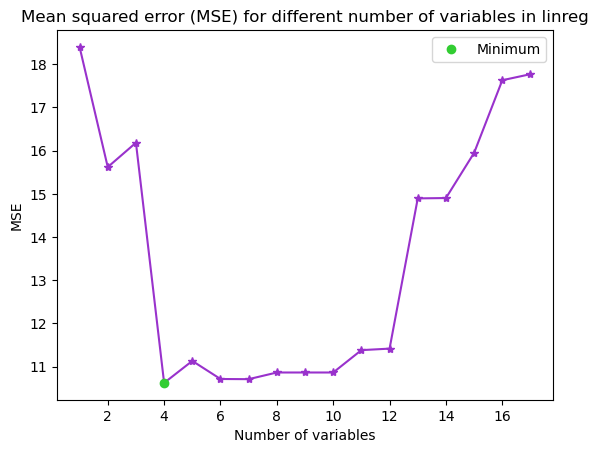

In [17]:
# plotting the MSE values for different number of variables chosen by forward selection
plt.plot(range(1,num_variables-1), MSE_list, "*-", color = "darkorchid")
plt.plot(MSE_list.index(min(MSE_list))+1, min(MSE_list), "o", color = "limegreen",label = "Minimum") # showing minimum in different color
plt.xlabel("Number of variables")
plt.ylabel("MSE")
plt.title("Mean squared error (MSE) for different number of variables in linreg")
plt.legend()
plt.show()

In [18]:
print(f"Lowest MSE for n = {MSE_list.index(min(MSE_list)) + 1} features")

# retraining the model for n = 4 features
forward = SequentialFeatureSelector(model, n_features_to_select=4, direction="forward")
forward.fit(X_train, y_train)
selected = forward.get_support()
X_train_selected = forward.transform(X_train)
X_test_selected = forward.transform(X_test)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
y_pred_train = model.predict(X_train_selected)

Lowest MSE for n = 4 features


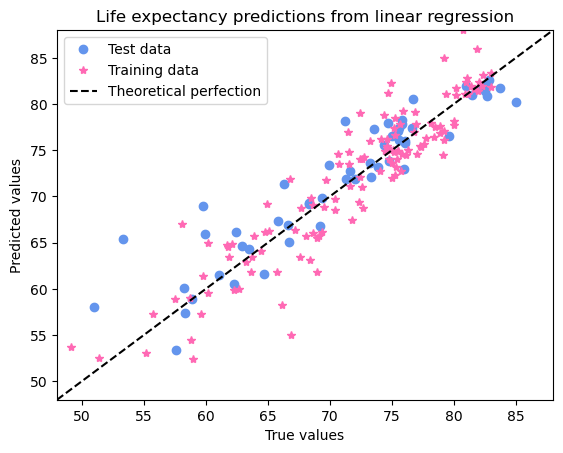

In [19]:
# ploting the predictions

# finding the appropriate limits for the axis
x1 = min(min(y_pred),min(y_test)) - 3
x2 = max(max(y_pred),max(y_test)) + 3

# plotting the predictions
plt.plot(y_test, y_pred, "o", color = "cornflowerblue", label = "Test data")
plt.plot(y_pred_train, y_train, "*", color = "hotpink", label = "Training data")
# plotting the line y = x, pre4dictions should lie on the line in the perfect case, would mean prediction == target value
plt.plot([x1, x2], [x1, x2], "--", color = "black", label= "Theoretical perfection") 
# adjusting the limits of the axis
plt.xlim(x1, x2)
plt.ylim(x1, x2)

plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.legend()
plt.title("Life expectancy predictions from linear regression")
plt.show()


This plot is to show the performance of the model in a visual way. If the predictions align perfectly with the target values, we would have a diagonal. This will off course never happen in reality, but we use the plot as a visual way of seeing how close we are. It looks ok here. 

In [20]:
# MSE
mse = mean_squared_error(y_test, y_pred)
print(mse)

# R^2
r2 = r2_score(y_test, y_pred)
print(r2)

10.625222119789568
0.8451939779305638


Forward selection was used as the model selection method for this task. This is simply a choice and I could have chosen differently. I used MSE to evaluate which model was the best. This is also a choice. AIC or BIC could have been used instead.

When evaluation whether a linear model is sufficient or not, we also have to take into consideration that we do not have much data, only 183 rows/data points. I could have chosen to keep all the years in the dataset, but it would make for a different interpretation of the plots.

The MSE measures the average squared difference between the predicted values and the target values. A lower MSE indicates a better model. We measure MSE on the test set. The best model has an MSE of 10.6 (rounded). 

R^2 is a measure of how well our model explaines the variance in the data. It is a number in [0,1]. 1 indicates a perfect model. The best model has an R^2 of 0.84 (rounded).mThis is fairly ok.

This seems to be an ok dataset to use linear regression on. The fact that we have limited data makes it harder to draw any conclusions or to hav a vry complex model.